<a href="https://colab.research.google.com/github/EnneRebeca/An-lises-com-Python/blob/main/Atividade_2_Enne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A) Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados**

**Dataset: Análise de sentimentos em Rede Social**
 https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset
---

**Contexto**: O dataset foi extraido do Kaggle afim de auxiliar na execução do trabalho. O documento fornece como feactures Likes, retweets, platform (instagram, facebook etc) dentre outros. Nesse contexto, foi utilizado os "likes" e "Retweets" e as classes podem ser representados pelos sentimentos (positivos, negativos ou neutros) ou pelas hashtags analisadas, como #fitness e #food.

Bibliotecas utilizadas

In [1]:
#Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carregando dataset

In [3]:
# Caminho do arquivo CSV
file_path = "sentimentdataset.csv"

# Leitura do arquivo
df = pd.read_csv(file_path)
print(df.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

## Criação do Histograma

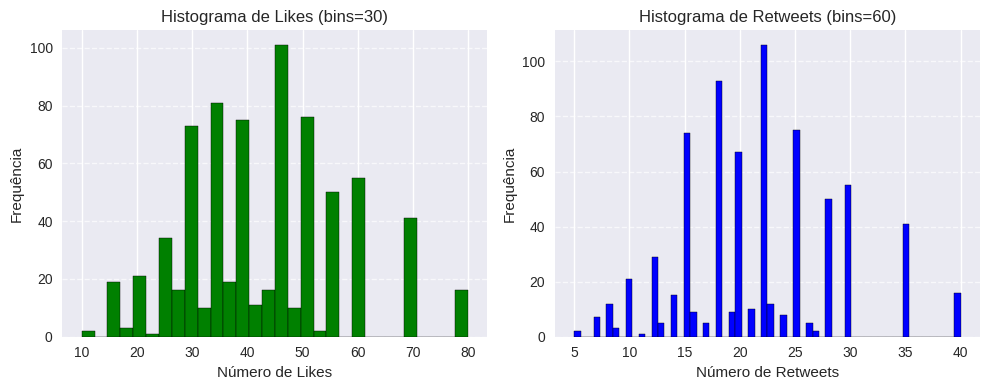

In [ ]:
# Limpeza de dados
df_clean = df.dropna(subset=['Likes','Retweets'])

# Número de Bins
bins_30 = 30
bins_60 = 60

# Estilo do Matplotlib
plt.style.use('seaborn-v0_8')

# Dois subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Primeiro histograma: 30 bins
axes[0].hist(df_clean['Likes'], bins=bins_30, color='green', edgecolor='black')
axes[0].set_title(f'Histograma de Likes (bins={bins_30})')
axes[0].set_xlabel('Número de Likes')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Segundo histograma: 60 bins
axes[1].hist(df_clean['Retweets'], bins=bins_60, color='blue', edgecolor='black')
axes[1].set_title(f'Histograma de Retweets (bins={bins_60})')
axes[1].set_xlabel('Número de Retweets')
axes[1].set_ylabel('Frequência')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()
plt.show()

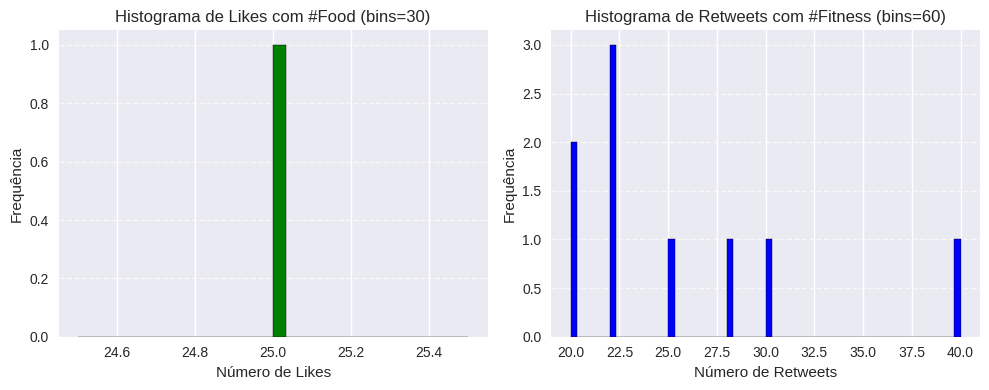

In [21]:
# Limpeza dos dados: removendo os valores nulls 'Likes' e 'Retweets'
df_clean = df.dropna(subset=['Likes', 'Retweets'])

# Filtro com a hashtag #Food
df_food = df_clean[df_clean['Hashtags'].str.contains('#Food', case=False, na=False)]

# Filtro com a hashtag #Fitness
df_fitness = df_clean[df_clean['Hashtags'].str.contains('#Fitness', case=False, na=False)]

# Número de Bins
bins_likes = 30  # Menos bins + intervalo por bin
bins_retweets = 60  # Mais bins - intervalo por bin

# Estilo do Matplotlib
plt.style.use('seaborn-v0_8')

# Dois subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Primeiro histograma
axes[0].hist(df_food['Likes'], bins=bins_likes, color='green', edgecolor='black')
axes[0].set_title(f'Histograma de Likes com #Food (bins={bins_likes})')
axes[0].set_xlabel('Número de Likes')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Segundo histograma
axes[1].hist(df_fitness['Retweets'], bins=bins_retweets, color='blue', edgecolor='black')
axes[1].set_title(f'Histograma de Retweets com #Fitness (bins={bins_retweets})')
axes[1].set_xlabel('Número de Retweets')
axes[1].set_ylabel('Frequência')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()
plt.show()

**Discussão**:
1.   Histograma de Likes com a hashtag #Food: (bins=30) simplifica a apresentação do histograma, contudo os dados ficam concentrados.
O histograma indica que a hashtag #Food recebeu aproximadamente 25 likes, número de curtidas, sugerindo que essa concentração tendem a ter uma frequência de curtidas consistente.
2.  Histograma de Retweets com a  hashtag #Fitness: (bins=60) esse número de bins, mostra um menor intervalo por bin, ajuda na melhor visualização dos detalhes dos dados, assim como, ajuda a distinguir padrões de engajamento. Esse histograma possui uma distribuição mais dispersa, de 20 a 40 retweets, ou seja, tem maior variabilidade.

**B)** **Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada.  Sempre considerando o contexto do seu primeiro trabalho.**

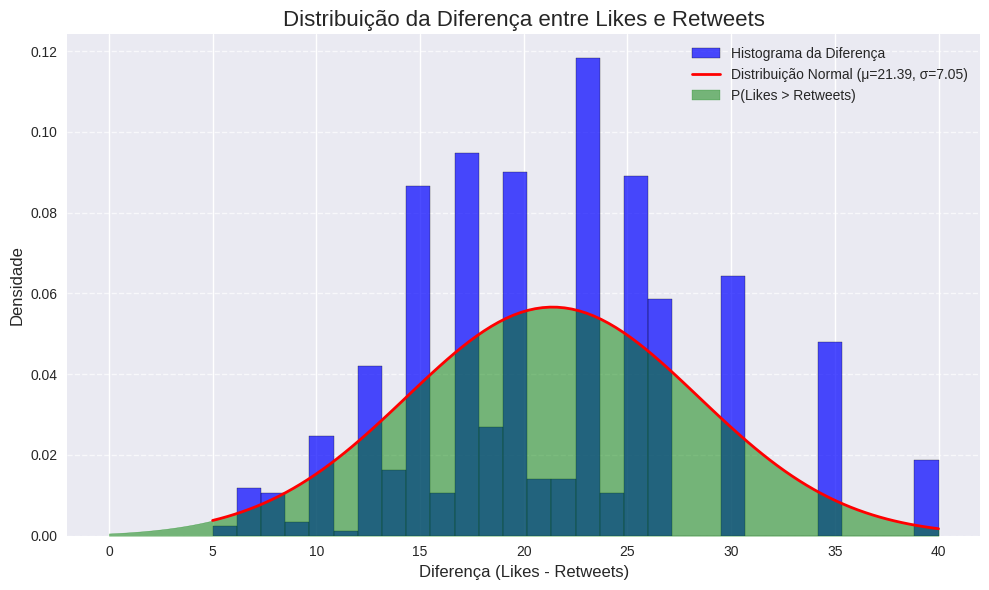

Probabilidade de ter mais Likes do que Retweets: 0.9988


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Carregando o dataset
file_path = "sentimentdataset.csv"
df = pd.read_csv(file_path)

# Limpeza de dados nulls
df_clean = df.dropna(subset=['Likes', 'Retweets'])

# Calculando a diferença entre Likes e Retweets
df_clean['Difference'] = df_clean['Likes'] - df_clean['Retweets']

# Ajuste distribuição normal à diferença
mu_diff, sigma_diff = norm.fit(df_clean['Difference'])

# Gerar valores x para a curva de distribuição normal
x_diff = np.linspace(min(df_clean['Difference']), max(df_clean['Difference']), 100)
pdf_diff = norm.pdf(x_diff, mu_diff, sigma_diff)

# Plotar o histograma da diferença com a curva de distribuição normal
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Difference'], bins=30, density=True, color='blue', alpha=0.7, edgecolor='black', label='Histograma da Diferença')
plt.plot(x_diff, pdf_diff, 'r-', lw=2, label=f'Distribuição Normal (μ={mu_diff:.2f}, σ={sigma_diff:.2f})')

# Destacar a área onde D > 0 (Likes > Retweets)
x_positive = np.linspace(0, max(df_clean['Difference']), 100)
pdf_positive = norm.pdf(x_positive, mu_diff, sigma_diff)
plt.fill_between(x_positive, pdf_positive, color='green', alpha=0.5, label='P(Likes > Retweets)')

# Títulos e rótulos
plt.title('Distribuição da Diferença entre Likes e Retweets', fontsize=16)
plt.xlabel('Diferença (Likes - Retweets)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()
plt.show()

# Calcular a probabilidade de ter mais Likes > Retweets
z_score = (0 - mu_diff) / sigma_diff
prob_likes_greater_than_retweets = 1 - norm.cdf(z_score)
print(f"Probabilidade de ter mais Likes do que Retweets: {prob_likes_greater_than_retweets:.4f}")

**Discussão: **Hipoteticamente para a minha pesquisa, qual a probabilidade de sair mais likes do que retweets?

Probabilidade de ter mais Likes do que Retweets: 0.9988

Primeiro é calculado a diferença entre Likes e Retweets:
D= Likes - Retweets
Depois é ajustado a distribuição normal os valores da diferença, e obtém-se a média (μ_diff) e o desvio padrão (σ_diff). Onde a área destacada D > 0 é a que possui mais likes do que retweets. Para calcular a probabilidade D > 0 uso a função (norm.cdf()):
P(D > 0)=1 - P(D ≤ 0)

Após calculo o Z-score:

Z= 0 - μdiff
    σ diff

A área destacada em verde representa a probabilidade de uma publicação ter mais likes do que retweets.

C) Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.